In [1]:
!pip install -q kaggle


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: C:\Users\Akshit Srivastava\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d bhaveshmittal/melanoma-cancer-dataset

Dataset URL: https://www.kaggle.com/datasets/bhaveshmittal/melanoma-cancer-dataset
License(s): CC0-1.0
 91% 72.0M/79.4M [00:01<00:00, 89.5MB/s]
100% 79.4M/79.4M [00:01<00:00, 66.7MB/s]


In [4]:
!unzip /content/melanoma-cancer-dataset.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
!pip install glob2

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for glob2: filename=glob2-0.7-py2.py3-none-any.whl size=9311 sha256=8df6c961d71b1cac11f69657e41797cbc22273e6e53c5ae822c2b482c9387545
  Stored in directory: c:\users\akshit srivastava\appdata\local\pip\cache\wheels\74\58\fc\b08b627b1d892394725b05609cd1d9037150a494891b137e8a
Successfully built glob2



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: C:\Users\Akshit Srivastava\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [9]:
!pip install keras


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: C:\Users\Akshit Srivastava\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [10]:
!pip install keras-models


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: C:\Users\Akshit Srivastava\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [14]:
pip install tensorflow[and-cuda]

^C
Note: you may need to restart the kernel to use updated packages.


In [11]:
!pip install matplotlib


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: C:\Users\Akshit Srivastava\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [1]:
from glob import glob
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import cv2
from PIL import Image, ImageEnhance
import warnings
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


In [2]:
!warnings.filterwarnings("ignore")

'warnings.filterwarnings' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
%ls


In [3]:
train_pth = "melanoma-cancer-dataset/train"
val_pth = "melanoma-cancer-dataset/test"

In [4]:
print(os.listdir(train_pth))
print(os.listdir(val_pth))

['Benign', 'Malignant']
['Benign', 'Malignant']


In [5]:
for labels in  os.listdir(train_pth) :
    files = glob(pathname= str( train_pth +'//' + labels + '/*.jpg'))
    print(f'For training , found {len(files)} in folder {labels}')

For training , found 6289 in folder Benign
For training , found 5590 in folder Malignant


In [6]:
for labels in  os.listdir(val_pth) :
    files = glob(pathname= str( val_pth +'//' + labels + '/*.jpg'))
    print(f'For training , found {len(files)} in folder {labels}')

For training , found 1000 in folder Benign
For training , found 1000 in folder Malignant


In [37]:
X_train = []
Y_train = []

image_size = 128
labels = ['Benign', 'Malignant']
for i in labels:
  folderpath = os.path.join(train_pth ,i)
  for j in os.listdir(folderpath):
    img = cv2.imread(os.path.join(folderpath,j))
    img = cv2.resize(img, (image_size,image_size))
    X_train.append(img)
    Y_train.append(i)

for i in labels:
  folderpath = os.path.join(val_pth,i)
  for j in os.listdir(folderpath):
    img = cv2.imread(os.path.join(folderpath,j))
    img = cv2.resize(img, (image_size,image_size))
    X_train.append(img)
    Y_train.append(i)


In [60]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train, Y_train = shuffle(X_train, Y_train, random_state = 101)
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 101)

datagen = ImageDataGenerator(
    rotation_range=10,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

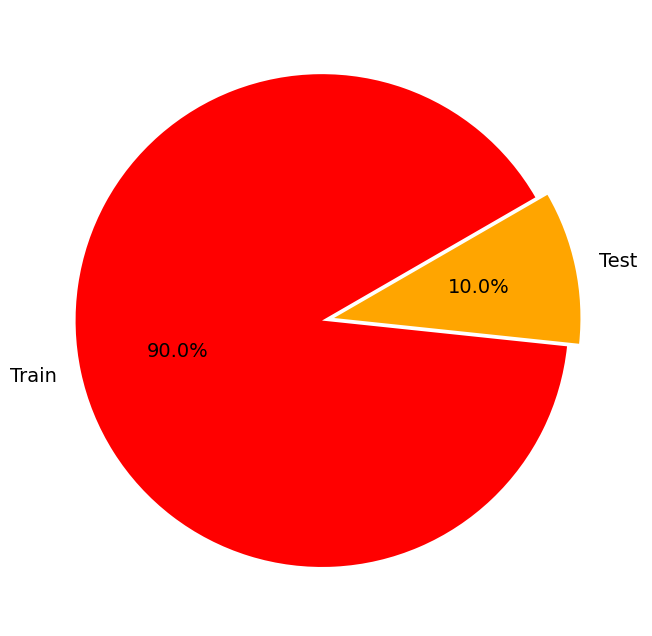

In [9]:
def plot_split():
  plt.figure(figsize=(12,8))
  colors = ['Red' , 'Orange']
  plt.rcParams.update({'font.size': 14})
  plt.pie([len(x_train), len(x_test)],
  labels=['Train','Test'],
  colors=colors, autopct='%.1f%%', explode=(0.05,0),
  startangle=30);

plot_split()

In [62]:
y_train_new = []
for i in y_train:
  y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
  y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

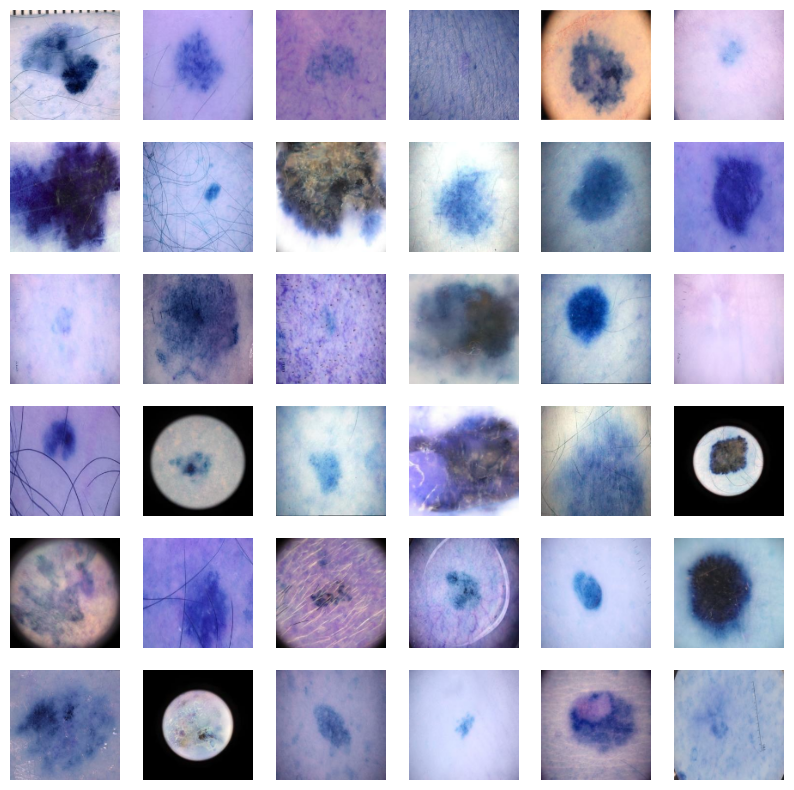

In [11]:
def sample_scans():
  plt.figure(figsize=(10,10))
  for n , i in enumerate(list(np.random.randint(0,len(x_train),36))) :
      plt.subplot(6,6,n+1)
      plt.imshow(x_train[i])
      plt.axis('off')
sample_scans()

In [12]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K

In [16]:
def densenet(input_shape, n_classes, filters = 32):

    #batch norm + relu + conv
    def bn_rl_conv(x,filters,kernel=1,strides=1):

        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, kernel, strides=strides,padding = 'same')(x)
        return x

    def dense_block(x, repetition):

        for _ in range(repetition):
            y = bn_rl_conv(x, 4*filters)
            y = bn_rl_conv(y, filters, 3)
            x = concatenate([y,x])
        return x

    def transition_layer(x):

        x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
        x = AvgPool2D(2, strides = 2, padding = 'same')(x)
        return x

    input = Input (input_shape)
    x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
    x = MaxPool2D(3, strides = 2, padding = 'same')(x)

    for repetition in [6,12,24,16]:

        d = dense_block(x, repetition)
        x = transition_layer(d)
    x = GlobalAveragePooling2D()(d)
    output = Dense(n_classes, activation = 'softmax')(x)

    model = Model(input, output)
    return model

In [35]:
input_shape = 128, 128, 3
n_classes = 2

In [45]:
model = densenet(input_shape,n_classes)

In [46]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_363 (Conv2D)         (None, 64, 64, 64)           9472      ['input_4[0][0]']             
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 64)           0         ['conv2d_363[0][0]']          
 g2D)                                                                                             
                                                                                                  
 batch_normalization_360 (B  (None, 32, 32, 64)           256       ['max_pooling2d_3[0][0]'

In [35]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.4 MB/s eta 0:00:00


In [28]:
!pip install pydot


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
# Visualize the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True)

# Display the model architecture plot
image = plt.imread('model_architecture.png')
plt.imshow(image)
plt.axis('off')
plt.show()

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [51]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [63]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

history = model.fit(datagen.flow(x_train, y_train),epochs=10,validation_data=(x_val, y_val))

Epoch 1/10
317/317 [==============================] - 253s 791ms/step - loss: 0.3670 - accuracy: 0.8406 - val_loss: 0.4590 - val_accuracy: 0.7760
Epoch 2/10
317/317 [==============================] - 242s 764ms/step - loss: 0.3369 - accuracy: 0.8553 - val_loss: 0.8503 - val_accuracy: 0.5698
Epoch 3/10
317/317 [==============================] - 256s 806ms/step - loss: 0.3378 - accuracy: 0.8560 - val_loss: 0.5684 - val_accuracy: 0.7298
Epoch 4/10
317/317 [==============================] - 245s 773ms/step - loss: 0.3248 - accuracy: 0.8546 - val_loss: 2.4458 - val_accuracy: 0.5902
Epoch 5/10
317/317 [==============================] - 242s 763ms/step - loss: 0.3168 - accuracy: 0.8690 - val_loss: 0.3543 - val_accuracy: 0.8436
Epoch 6/10
317/317 [==============================] - 241s 759ms/step - loss: 0.3098 - accuracy: 0.8659 - val_loss: 0.7088 - val_accuracy: 0.6498
Epoch 7/10
317/317 [==============================] - 237s 748ms/step - loss: 0.3063 - accuracy: 0.8680 - val_loss: 0.4040 -

In [64]:
model.save('cancer.h5')

c:\Users\Akshit Srivastava\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


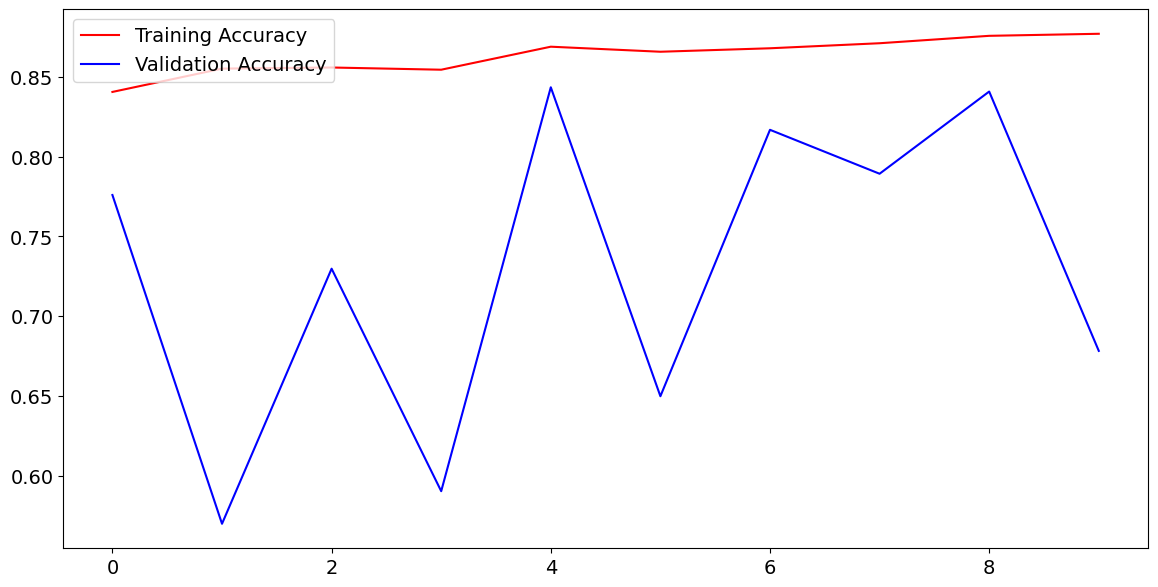

In [65]:
def train_vs_valid():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  fig = plt.figure(figsize=(14,7))
  plt.plot(epochs,acc,'r',label="Training Accuracy")
  plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
  plt.legend(loc='upper left')
  plt.show()

train_vs_valid()

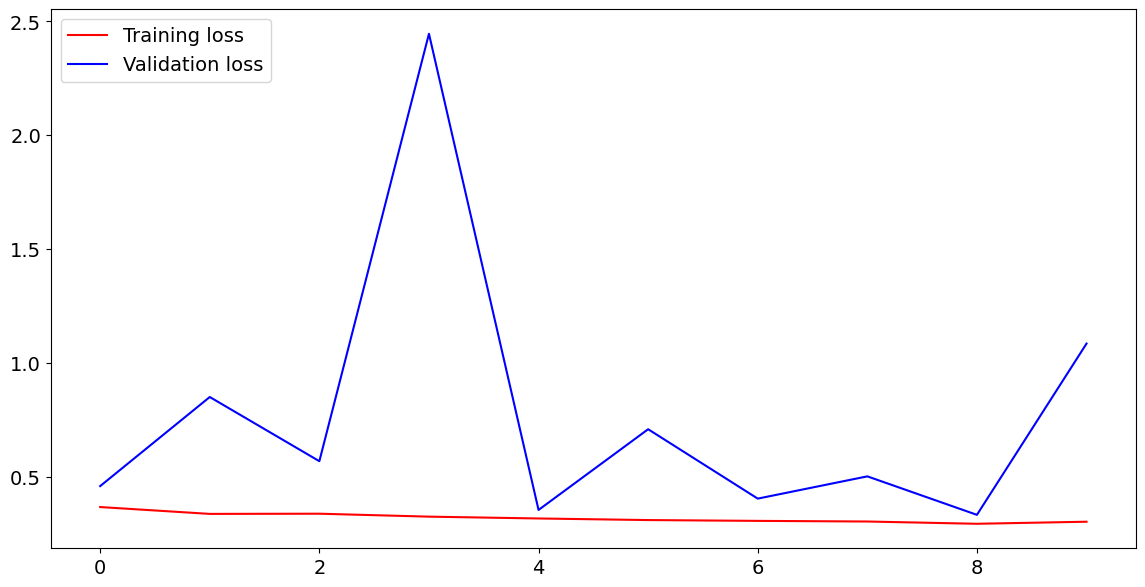

In [66]:
def loss():
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  fig = plt.figure(figsize=(14,7))
  plt.plot(epochs,loss,'r',label="Training loss")
  plt.plot(epochs,val_loss,'b',label="Validation loss")
  plt.legend(loc='upper left')
  plt.show()

loss()

In [67]:
import pandas as pd
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Check the format of true labels and convert them accordingly
if y_test.ndim > 1 and y_test.shape[1] > 1:
    # Multilabel format, convert to multiclass
    y_test = np.argmax(y_test, axis=1)
else:
    # Multiclass format, no conversion needed
    y_test = y_test

#predict()
# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
report_df.to_csv('evaluation_report.csv', index=False)

44/44 [==============================] - 12s 265ms/step
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       745
           1       0.70      0.55      0.62       643

    accuracy                           0.68      1388
   macro avg       0.69      0.67      0.67      1388
weighted avg       0.68      0.68      0.68      1388



44/44 [==============================] - 11s 253ms/step


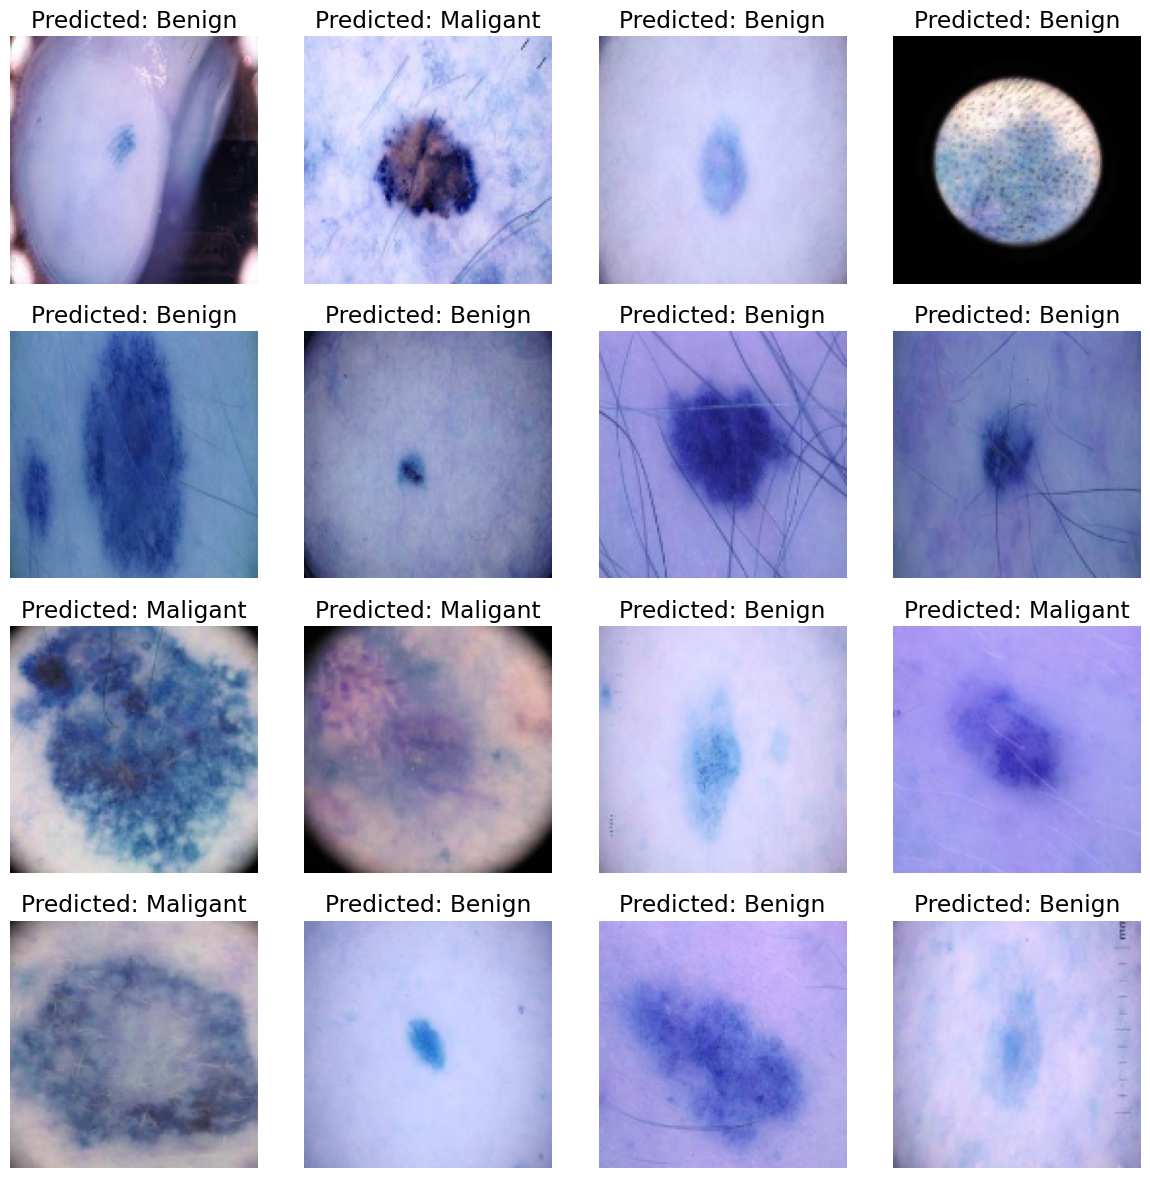

In [68]:
def show_predictions():
  predictions = model.predict(x_test)
  predicted_labels = np.argmax(predictions, axis=1)

  # Define the label mapping dictionary
  label_mapping = {0: 'Benign', 1: 'Maligant'}  # Add more labels if needed

  # Display a subset of the images and predictions
  num_images = len(x_test)
  num_display = 16  # Number of images to display
  display_indices = np.random.choice(num_images, size=num_display, replace=False)

  # Create the figure and subplots
  num_rows = int(np.ceil(num_display / 4))
  fig, axes = plt.subplots(num_rows, 4, figsize=(12, 3*num_rows))

  # Iterate through the display indices and show the images and predictions
  for i, ax in enumerate(axes.flat):
      img_index = display_indices[i]
      ax.imshow(x_test[img_index])  # Assuming X_test contains the images in the appropriate format
      ax.axis('off')
      predicted_class = label_mapping[predicted_labels[img_index]]
      ax.set_title(f"Predicted: {predicted_class}")

  plt.tight_layout()
  plt.show()
show_predictions()